<a href="https://colab.research.google.com/github/miluseel/MiluseelAI/blob/main/Chap4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다양한 분류 알고리즘
### 4-1.로지스틱 회귀

###럭키백의 확률

In [2]:
#데이터 준비
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


* 데이터프레임 : 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조
  - 넘파이 배열과 비슷하게 열과 행으로 이루어져 있음
  - 통계와 그래프를 위한 메서드를 풍부하게 제공
  - 넘파이로 상호 변환이 쉽고 사이킷런과도 잘 호환됨

In [3]:
#어떤 종류의 생선이 있는지 species열에서 고유한 값 추출
#판다스의 unique()함수 사용
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
#데이터프레임에서 5개 열 선택
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]

In [5]:
#fish_input에 저장 후 fish_input에 저장된 5개의 특성 출력해보기
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [6]:
#타겟데이터 생성
fish_target = fish['Species']

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
#StandardScaler클래스 사용해 훈련세트와 테스트 세트 표준화 전처리
#훈련세트의 통계값으로 테스트 세트 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측
KNeighborClassifier클래스 객체 -> 훈련세트로 모델 훈련 후 각각 점수 확인

In [9]:
#k = 3으로 지정
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


* 타깃 데이터에서 2개 이상의 클래스가 포함된 문제 : 다중분류
  - 타깃값을 숫자로 바꾸어 입력할 수 있음
  - 사이킷런에서는 문자열로 된 타깃값 그대로 사용 가능
  - pd.unique(fish['Speices']출력 순서와 다름
  - KNeighborsClassifier 정렬된 타깃값은 classes_ 속성에 저장되어 있음


In [10]:
print(kn.classes_)

#Bream이 첫번째클래스, Parkki가 두번째 클래스 ...

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
#predict()로 타깃값으로 예측 출력가능
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


* 사이킷런은 predict-probe()로 확률값 반환
  - 출력 순서는 classes_속성과 같음

In [12]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #소숫점 4번째 까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


 cf. 네번째 샘플 <br>
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]<br>
 1클래스확률|2확률|...<br>
 (Bream)     (Parkki)

In [13]:
#4번째 샘플 선택 - 최근접 이웃 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


* 이 샘플의 이웃은 5번째 클래스인 roach가 1개 perch가 2개
  - 5번째 클래스에 대한 확률은 1/3 , 3번째 클래스의 확률은 2/3 = predict_proba()출력과 같음을 알 수 있음

##로지스틱 회귀
 - 분류모델 ( 회귀모델 아님 )
 - 선형방정식 학습
 - cf. z = a*weight + b*length + c* diagnal + d* height + e * width + f
 - a,b,c,d,e : 가중치 / 계수
 - 0-1사이의 값

 시그모이드 함수 / 로지스틱 함수
 - z가 아주 큰 음수일 때 ; 0
 - z가 아주 큰 양수일 때 : 1


[img src="스크린샷 2025-11-29 214704.png" width="40%"](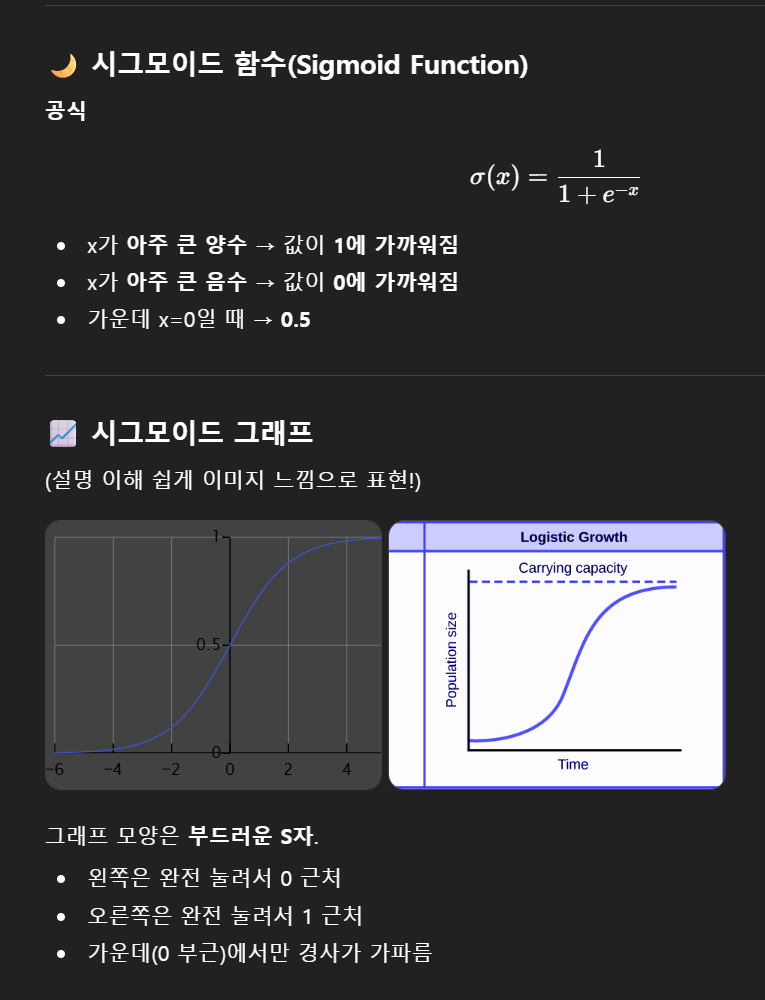)

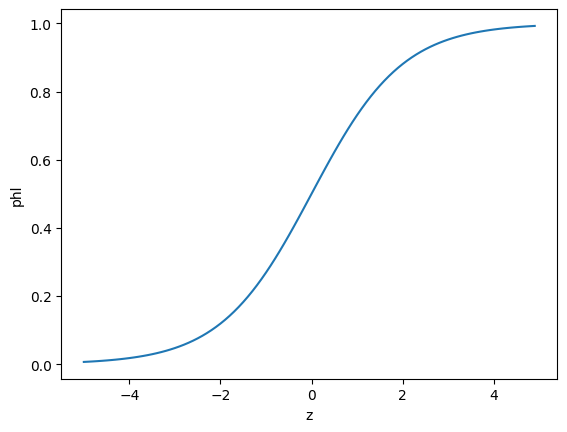

In [14]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/ (1 + np.exp(-z)) #지수함수계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phl')
plt.show()

* 지수함수계산 : np.exp()

###이진분류 수행
(사이킷런)
  - 시그모이드 함수의 출력이 0.5보다 크면 양성클래스
  - 0.5보다 작으면 음성 클래스

###로지스틱 회귀로 이진분류 수행
넘파이 배열 : 불리언 인덱싱으로 행 선택

In [15]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
#불리언 인덱스로 true만 남겨
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

#도미 골라낼 때 : train_target == 'Bream' 이런식으로

In [17]:
#LogisticRegression 클래스는 선형모델이므로 sklearn.linear_model패키지 아래
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [18]:
#train_bream_smelt의 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

#두번째 샘플 제외하고 모두 도미로 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
#예측 확률 출력 [음성 클래스(0)에 대한 출력|양성 클래스(0)에 대한 출력]
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [20]:
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
print(lr.coef_,lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


* 해당 로지스틱 회귀모델의 방정식<br>
z = -0.40451732 *x weight -0.57582787*x length -0.662 *x diagonal -1.013 *x height -0.731 * width -2.162

In [22]:
#decision_function()메서드로 z값 출력 - 5개만

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다 !
  - python : scipy라이브러리에도 시그모이드 함수 있음
  - expit()
  - np.expit()이용보다 편리하고 안전함

In [23]:
from scipy.special import expit
print(expit(decisions))

#predict_proba()의 두 번째 열과 값 동일 : 양성클래스에 대한 z값 반환

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


* predict_proba() : 음성클래스, 양성클래스에 대한 확률 출력
* decision_function(): 양성클래스에 대한 z값 계산
* coef_, intercept_속성 : 로지스틱이 학습한 선형 방정식의 계수 포함

###로지스틱 회귀로 다중분류 수행하기
  - LogisticRegression 클래스 사용
  - max_iter 매개변수에서 반복 횟수를 지정, 기본값 100
  - 릿지 회귀와 같이 계수의 제곱을 규제 = L2규제
  - 규제를 제어하는 매개변수 : C ( 기본값 1 )
    - 작을수록 규제가 커짐

In [24]:
#LogisticRegression 클래스로 다중 분류 모델 훈련
#7개의 생선 데이터가 모두 들어있는 train_scaled, train_target사용
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
#테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
#테스트 세트의 처음 5개 샘플에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
#class_속성에서 클래스 정보 확인
print(lr.classes_)

#첫번째 샘플의 가장 높은 확률인 84.2%가 perch(농어)
#2번째 샘플의 6번째열 smelt는 94.6%로 예측

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
#coef_ , intercept_크기 출력
print(lr.coef_.shape, lr.intercept_.shape)

#coef_배열의 행 7개, 열 5개 / intercept_ 7개 행
#z를 7 개 계산한다는 의미

(7, 5) (7,)


* 다중분류는 클래스마다 z값을 하나씩 계산
* 가장 높은 z값을 출력하는 클래스가 예측 클래스
* 다중 분류에서는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환<br>(이진분류에서는 시그모이드 함수를 사용해 z를 0-1값으로 변환)


* 소프트맥스 함수<br>
: 여러 개의 선형 방정식의 출력값을 0-1사이의 확률로 압축하고 전체 합이 1이 되도록 만듦<br>
: 최댓값에 높은 확률을 할당하면서 다른 값에도 작은 확률을 부여<br>
: 지수 함수를 사용하기 때문에 정규화된 지수함수라고도 함<br>
: 각각을 모두 더하면 1이 됨 ( 확률의 합 : 1 )<br>
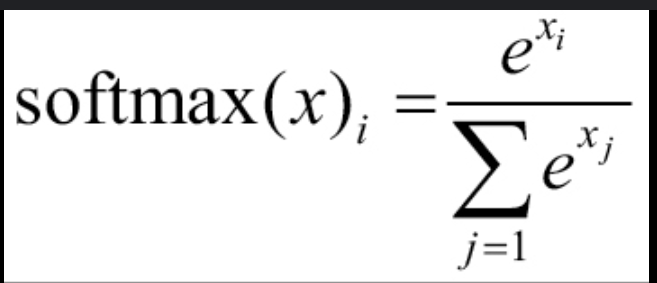

In [30]:
# 이진 분류에서 처럼 decision_function()메서드로 z1 - z7까지의 값을 구한 다음 소프트함수로 확률로 변환
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [31]:
#사이파이 _ scipy.special아래 softmax()함수사용
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


* softmax()의 axis매개변수 : 소프트맥스의 계산할 축 지정
* axis지정하지 않으면 배열 전체에 대해 소프트맥스를 계산

< 문제해결과정 복기 ><br>
* 럭기캑에 담긴 생선이 어떤 생선인지 예측하기!
* 분류모델 : 예측뿐만 아니라 예측의 근거가 되는 확률을 출력할 수 있음
  - 분류 모델이 얼마나 예측을 확신하는지를 보여줌
  - 확률이 높을수록 강한 예측
* k최근접 이웃모델을 출력 할 수 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력함 ( 어느정도의 예측만 가능 )

->
* 로지스틱 회귀 : 분류모델
* 선형회귀처럼 선형 방정식 사용함
* (but 계산값 출력이 아니라 ) 0-1 사이로 압축 = 0-100%
* 이진분류에서 : 하나의 선형 방정식을 훈련
  - 출력값을 시그모이드 함수에 통과 시켜 0-1사이의 값을 만듬 : 양성 클래스에 대한 확률
    - 음성클래스의 확률 : 1- 양성클래스의 확률
* 다중분류일 경우 클래스 개수만큼 방정식 훈련
  - 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만듬 ( -> 각 클래스에 대한 확률 )


< 함수 리마인드 ><br>
사이킷런
  - LogisticRegression : 선형분류 알고리즘 - 로지스틱 회귀를 위한 클래스<br>
    - sag / saga :확률적 경사 하강법 알고리즘 - 특성과 샘플 수가 많을 떄 성능이 빠르고 좋음
    - panalty 매개변수 : L2규제 ( 릿지방식 ) , L1규제 ( 라쏘방식 ) 선택가능
      - 기본값: L2
    - C매개변수 : 규제강도 제어
      - 기본값: 1.0
      - 값이 작을 수록 규제가 강해짐
  - predict_proba() :예측확률 반환
    - 이진 분류의 경우 샘플마다 음성 클래스, 양성클래스에 대한 확률을 반환
    - 다중분류의 경우 샘플마다 모든 클래스에 대한 확률을 반환
  - decision_function() :모델이 학습한 선형 방정식의 출력 반환
    - 이진 분류의 경우 양성클래스의 확률을 반환
      - 값이 0보다 크면 양성클래스, 작거나 같으면 음성 클래스로 예측
    - 다중 분류의 경우 각 클래스 마다 선형 방정식을 계산
      - 가장 큰 값의 클래스가 예측 클래스가 됨